In [4]:
#Nama:Dilara Kynta Putri Raflita
#NIM: 1103204059
#Kelas: TK44G4

In [5]:
#mengimport pustaka XGBoost untuk pemrosesan data dan evaluasi model

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [6]:
#mengimport file dataset dari google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data = pd.read_csv('/content/drive/MyDrive/sky server.csv', encoding='latin1')

EDA

In [8]:
data

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


EDA

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


VISUALISASI DATA

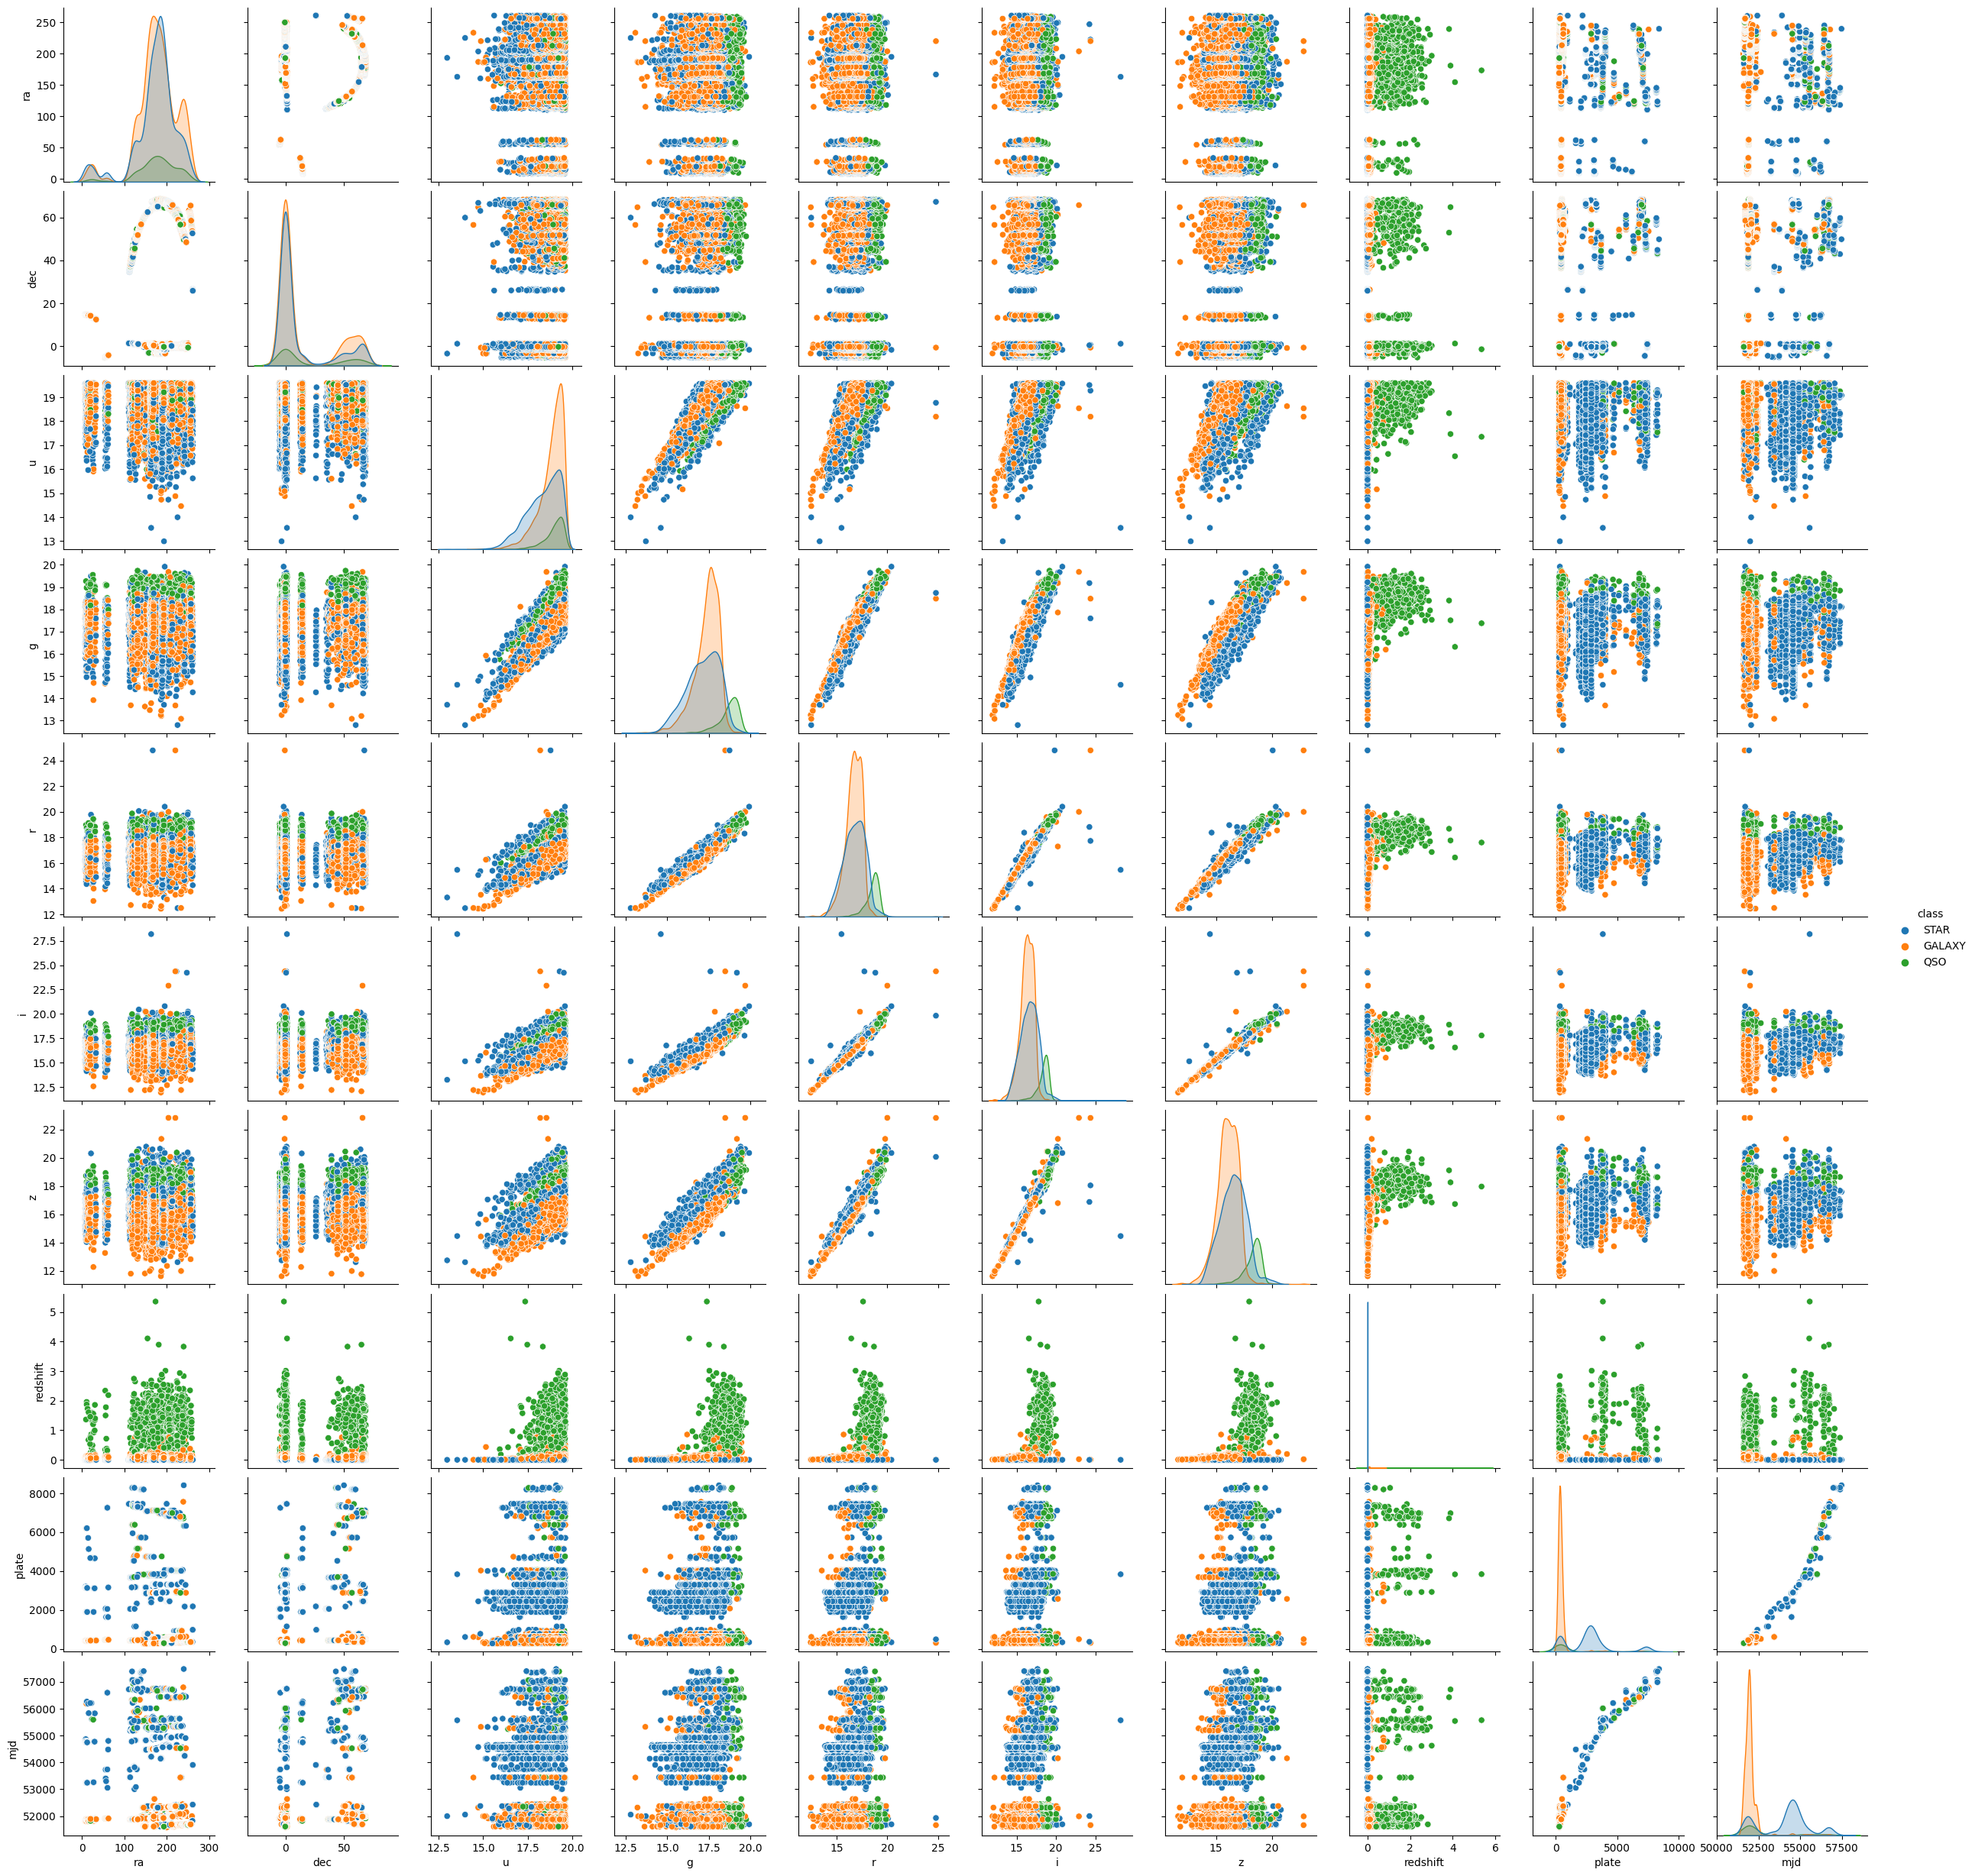

In [10]:
#PAIR PLOT UNTUK FITUR NUMERIK
import seaborn as sns
import matplotlib.pyplot as plt

# Memilih fitur-fitur numerik
numeric_features = ['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift', 'plate', 'mjd']

# Menggabungkan fitur numerik dengan target
data_numeric = data[numeric_features + ['class']]

# Membuat pair plot
sns.pairplot(data_numeric, hue='class')
plt.show()


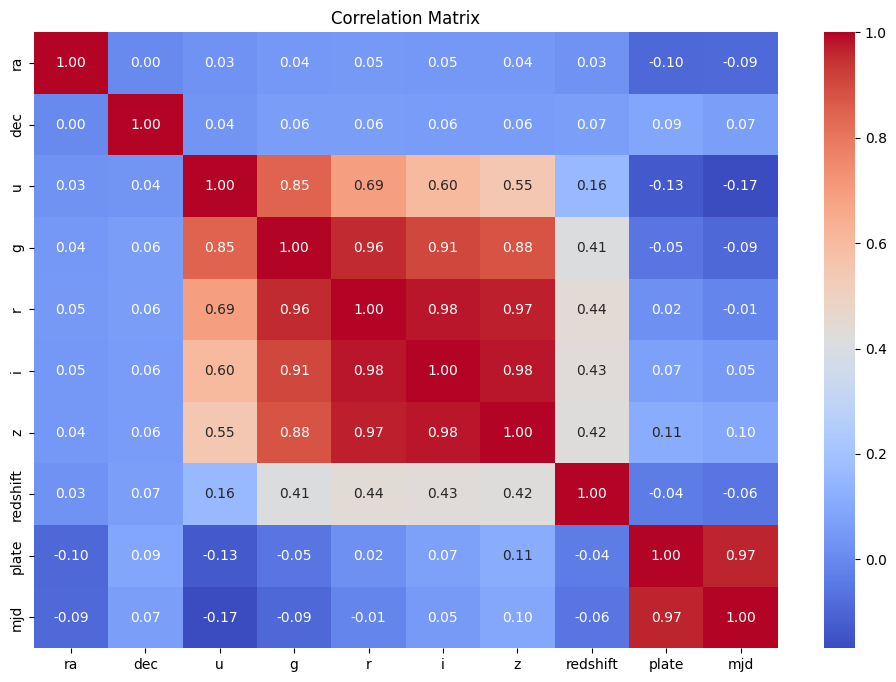

In [11]:
# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(12, 8))
correlation_matrix = data[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


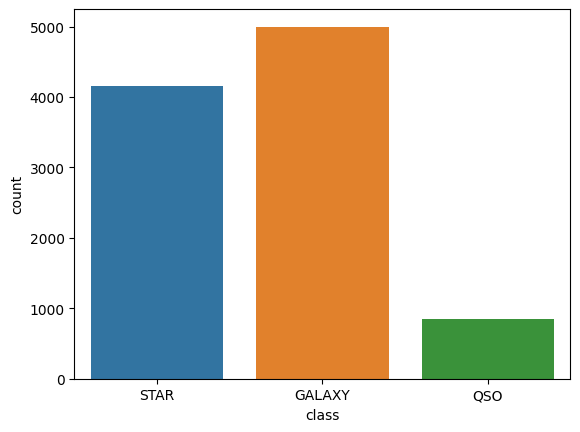

In [12]:
#count plot untuk distribusi kelas
sns.countplot(x='class', data=data)
plt.show()


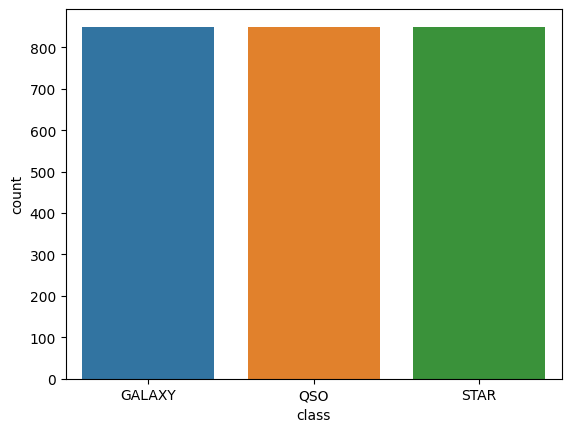

In [17]:
from imblearn.under_sampling import RandomUnderSampler

# Memisahkan fitur dan target
X = data.drop(['class'], axis=1)
y = data['class']

# Melakukan undersampling agar kelas 'STAR' tidak mendominasi
undersampler = RandomUnderSampler(sampling_strategy='not minority', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Count plot setelah undersampling
sns.countplot(x=y_resampled)
plt.show()


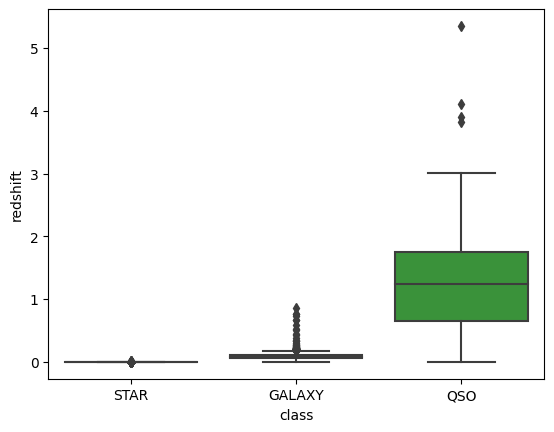

In [18]:
#boxplot untuk memahami sebaran nilai
sns.boxplot(x='class', y='redshift', data=data)
plt.show()

<ipython-input-19-f26fedddcceb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


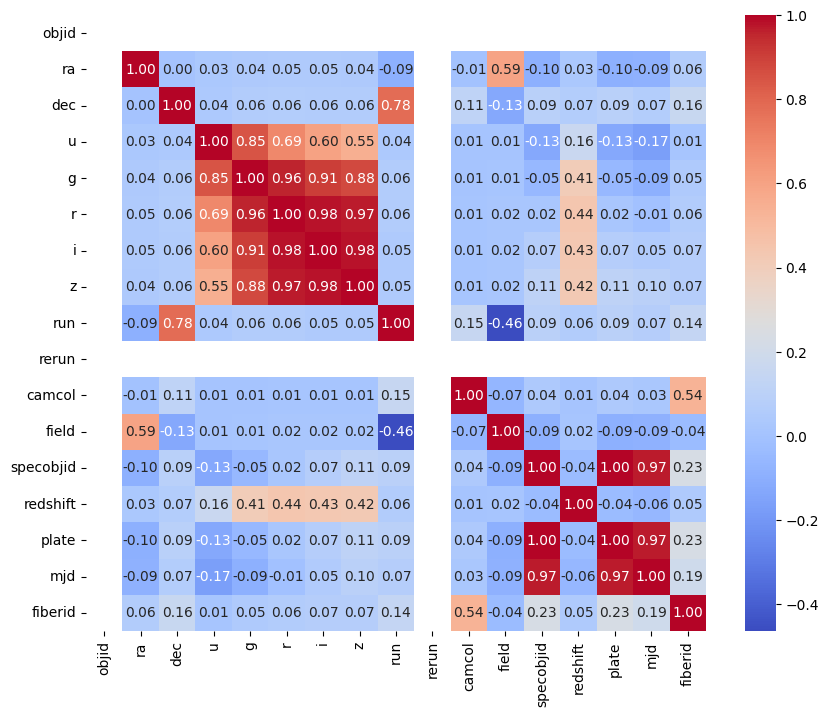

In [19]:
#visualisasi korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


TRAINING DATA

In [21]:
# Inisialisasi dan melihat beberapa baris pertama data
print(data.head())

          objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922   
2  1.237650e+18  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   
3  1.237650e+18  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233   
4  1.237650e+18  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492   

          z  run  rerun  camcol  field     specobjid   class  redshift  plate  \
0  15.22531  752    301       4    267  3.722360e+18    STAR -0.000009   3306   
1  16.39150  752    301       4    267  3.638140e+17    STAR -0.000055    323   
2  16.80125  752    301       4    268  3.232740e+17  GALAXY  0.123111    287   
3  15.90438  752    301       4    269  3.722370e+18    STAR -0.000111   3306   
4  16.61326  752    301       4    269  3.722370e+18    STAR  0.000590   3306   

     mjd  fiberid  
0  549

In [22]:
# Melakukan Label Encoding pada kolom 'class'
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])

In [23]:
# Memisahkan fitur dan target
X = data.drop(['class'], axis=1)
y = data['class']

In [24]:
# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Inisialisasi dan pelatihan model XGBoost
model = XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

EVALUASI DATA

In [26]:
# Melakukan prediksi pada set pengujian
y_pred = model.predict(X_test)

In [27]:
# Menampilkan hasil prediksi
print("Prediksi:", y_pred)

Prediksi: [0 1 0 ... 2 2 0]


In [28]:
# Menampilkan metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

classification_rep = classification_report(y_test, y_pred)
print(f'\nLaporan Klasifikasi:\n{classification_rep}')

Akurasi: 0.99

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       996
           1       0.98      0.94      0.96       190
           2       1.00      1.00      1.00       814

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000



In [29]:
# Menampilkan matriks konfusi
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'\nMatriks Konfusi:\n{conf_matrix}')


Matriks Konfusi:
[[989   3   4]
 [ 12 178   0]
 [  1   0 813]]


INPUT NEW DATA

In [30]:
# Data baru untuk prediksi
new_data = pd.DataFrame({
    'objid': [123456789],
    'ra': [12.345],
    'dec': [45.678],
    'u': [18.9],
    'g': [17.5],
    'r': [16.2],
    'i': [15.8],
    'z': [15.5],
    'run': [789],
    'rerun': [301],
    'camcol': [4],
    'field': [205],
    'specobjid': [987654321],
    'redshift': [0.123],
    'plate': [456],
    'mjd': [55000],
    'fiberid': [42]
})

In [31]:
# Melakukan prediksi pada data baru
new_data_pred = model.predict(new_data)

In [32]:
# Menggunakan inverse transform untuk mendapatkan kelas asli
predicted_class = le.inverse_transform(new_data_pred)

In [33]:
# Menampilkan hasil prediksi
print("Prediksi untuk data baru:", predicted_class)


Prediksi untuk data baru: ['GALAXY']


In [34]:
# Menambahkan data baru ke dalam DataFrame asli
data_new = data.append(new_data, ignore_index=True)

# Menampilkan data baru yang sudah ditambahkan
print("Data Baru yang Ditambahkan:")
print(data_new.tail())

Data Baru yang Ditambahkan:
              objid          ra        dec         u         g         r  \
9996   1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9997   1.237650e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9998   1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999   1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   
10000  1.234568e+08   12.345000  45.678000  18.90000  17.50000  16.20000   

              i         z   run  rerun  camcol  field     specobjid  class  \
9996   16.71661  16.69897  1345    301       3    162  5.033400e+17    0.0   
9997   17.43302  17.42048  1345    301       3    162  8.222620e+18    2.0   
9998   17.36284  17.13988  1345    301       3    163  5.033400e+17    0.0   
9999   15.83548  15.50588  1345    301       3    163  5.033410e+17    0.0   
10000  15.80000  15.50000   789    301       4    205  9.876543e+08    NaN   

       redshift  plate    mjd  fiberid  
9996 

<ipython-input-34-23dfaddf3523>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_new = data.append(new_data, ignore_index=True)
